In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data/student.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [12]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
# Checking for Null Values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [16]:
# Checking Unique Values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observation :
1. From the above data, all means are equal to each other (66.08 to 69.16)
2. All STD's are close (14.6 to 15.1)

In [21]:
print("Catogeries in 'gender' Feature - ",df.gender.nunique())
print("Catogeries in 'Race Ethnicity' Feature - ",df.gender.nunique())
print("Catogeries in 'Parental Level of Education' Feature - ",df.gender.nunique())
print("Catogeries in 'Lunch' Feature - ",df.gender.nunique())

Catogeries in 'gender' Feature -  2
Catogeries in 'Race Ethnicity' Feature -  2
Catogeries in 'Parental Level of Education' Feature -  2
Catogeries in 'Lunch' Feature -  2


#### Numerical and Catogerical Features

In [32]:
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
catogerical_features = [feature for feature in df.columns if df[feature].dtype =='O']
numerical_features

['math_score', 'reading_score', 'writing_score']

In [33]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3

#### Number of Students per subject

In [37]:
df[df['math_score']<20]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
787,female,group B,some college,standard,none,19,38,32,89,29.666667
980,female,group B,high school,free/reduced,none,8,24,23,55,18.333333


#### Plotting

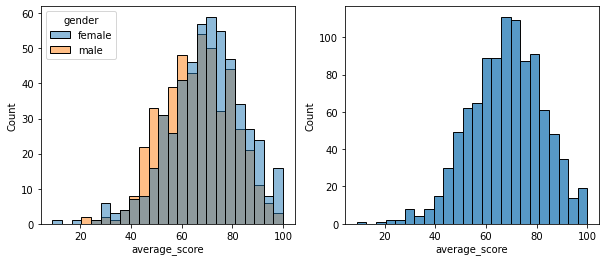

In [60]:
plt.figure(figsize=(10,4))
plt.title("Average SCore based on Gender")
p
plt.subplot(121)
sns.histplot(data = df,x ='average_score',hue='gender',)
plt.subplot(122)
sns.histplot(data=df,x='average_score',)
plt.show()

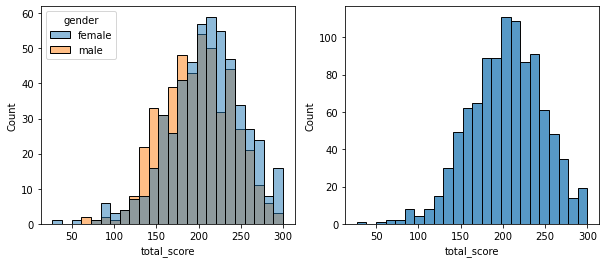

In [59]:
plt.figure(figsize=(10,4))
plt.title("Total SCore based on Gender")
plt.subplot(121)
sns.histplot(data = df,x ='total_score',hue='gender',)
plt.subplot(122)
sns.histplot(data=df,x='total_score',)
plt.show()